In [1]:
#Importing useful libraries
import numpy as np
import lmfit
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import astropy.units as u
import seaborn as sns

In [2]:
#Importing the data
columns=['name','redshift','distance_mod','DM_err','SN_prob']
data=pd.read_csv('SCPUnion2.1_mu_vs_z.txt', sep='\s',names=columns, header=5, engine='python')

In [3]:
print(data)

       name  redshift  distance_mod    DM_err   SN_prob
0    1993ag  0.050043     36.682368  0.166829  0.128419
1     1993o  0.052926     36.817691  0.155756  0.128419
2     1993b  0.070086     37.446737  0.158467  0.128419
3    1992bs  0.062668     37.483409  0.156099  0.128419
4    1992br  0.087589     38.229057  0.187746  0.128419
..      ...       ...           ...       ...       ...
574   D-000  1.017000     44.293971  0.171046  0.000015
575   D-006  1.315000     44.971358  0.187509  0.551672
576   P-009  0.821000     43.640939  0.194014  0.551672
577   R-012  1.215000     45.246521  0.560317  0.000148
578   Z-005  0.623000     42.514524  0.241428  0.551672

[579 rows x 5 columns]


In [4]:
#Check for NaN values
data.isnull().sum().sum()

0

In [5]:
#Correlation among the values
data.corr()

,redshift,distance_mod,DM_err,SN_prob
redshift,1.000000,0.883401,0.415372,0.419517
distance_mod,0.883401,1.000000,0.384451,0.600128
DM_err,0.415372,0.384451,1.000000,0.135325
SN_prob,0.419517,0.600128,0.135325,1.000000


<AxesSubplot:>

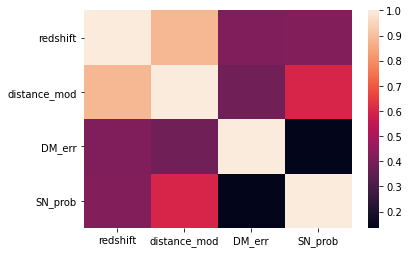

In [6]:
#Mapping the correlation
sns.heatmap(data.corr())

In [7]:
#Assign columns to values
zs = data.redshift
mm = data.distance_mod
dm = data.DM_err

In [8]:
#print(zs)

In [9]:
from astropy.cosmology import LambdaCDM

In [10]:
def DM(z,H0,Om,Ode):
    cosmo = LambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3, Ode0=0.7)
    DL=cosmo.luminosity_distance(z)
    mag=5*np.log10((DL/(10*u.pc)).decompose())
    return mag

In [14]:
p = lmfit.Parameters()
p.add_many(('Om',0.3),('H0',70.0),('Ode',0.7))

def residual(p):
    v = p.valuesdict()
    return (DM(zs,v['H0'],v['Om'],v['Ode'])-mm)/dm

In [15]:
mi = lmfit.minimize(residual, p, method='nelder', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 84
    # data points      = 579
    # variables        = 3
    chi-square         = 564.653902
    reduced chi-square = 0.98030191
    Akaike info crit   = -8.52681917
    Bayesian info crit = 4.55708826
##  Warning: uncertainties could not be estimated:
    Om:   at initial value
    H0:   at initial value
[[Variables]]
    Om:   0.30000000 (init = 0.3)
    H0:   70.0000000 (init = 70)
    Ode:  0.69980000 (init = 0.7)


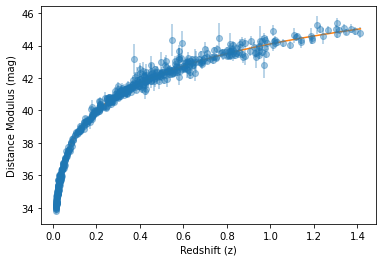

In [16]:
s = (zs.sort_values()).index
plt.errorbar(zs[s],mm[s],yerr=dm[s],fmt='o',alpha=0.4)
bestOm = mi.params.valuesdict()['Om']
bestH0 = mi.params.valuesdict()['H0']
bestOde =mi.params.valuesdict()['Ode']
plt.plot(zs[s],DM(zs[s],bestH0,bestOm,bestOde))
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mag)')
lmfit.report_fit(mi)